In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
from glob import glob
import os
import seaborn as sns
import xarray as xr

import matplotlib.pyplot as plt

sns.set(font="Helvetica")

seas = 'djf'

In [3]:
diri = r'/Users/fadhlilrizki/Documents/PhD/thesis/dataout/'
diro = r'/Users/fadhlilrizki/Documents/PhD/thesis/figures/stats/'

In [4]:
ds_QL = xr.open_dataset(diri+"combined_wave_extreme_Queensland_"+seas+".nc")
ds_QL

<xarray.Dataset>
Dimensions:    (list: 50, ncl1: 50)
Dimensions without coordinates: list, ncl1
Data variables:
    composite  (list) float32 ...
    median     (ncl1) float32 ...
    alpha      (list) float32 ...

In [5]:
combination = ["er_er_drydry",
               "er_er_wet_wet",
               
               "er_klv_drydry",
               "er_klv_drywet",
               "er_klv_wetdry",
               "er_klv_wetwet",
               
               "er_mjo_drydry",
               "er_mjo_drywet",
               "er_mjo_wetdry",
               "er_mjo_wetwet",
               
               "er_mrg_drydry",
               "er_mrg_drywet",
               "er_mrg_wetdry",
               "er_mrg_wetwet",
               
               "er_td_drydry",
               "er_td_drywet",
               "er_td_wetdry",
               "er_td_wetwet",
               
               "klv_klv_drydry",
               "klv_klv_wet_wet",
               
               "mjo_klv_drydry",
               "mjo_klv_drywet",
               "mjo_klv_wetdry",
               "mjo_klv_wetwet",
               
               "mjo_mjo_drydry",
               "mjo_mjo_wetwet",   
               
               "mrg_klv_drydry",
               "mrg_klv_drywet",
               "mrg_klv_wetdry",
               "mrg_klv_wetwet",
               
               "mrg_mjo_drydry",
               "mrg_mjo_drywet",
               "mrg_mjo_wetdry",
               "mrg_mjo_wetwet",
               
               "mrg_mrg_drydry",
               "mrg_mrg_wetwet",
               
               "mrg_td_drydry",
               "mrg_td_drywet",
               "mrg_td_wetdry",
               "mrg_td_wetwet",
               
               'td_klv_drydry',
               'td_klv_drywet',
               'td_klv_wetdry',
               'td_klv_wetwet',
               
               'td_mjo_drydry',
               'td_mjo_drywet',
               'td_mjo_wetdry',
               'td_mjo_wetwet',
               
               'td_td_drydry',
               'td_td_wetwet',
               
              ]

len(combination)

50

In [6]:
c = ds_QL["composite"]
a = ds_QL["alpha"]
ndays = ds_QL["composite"].attrs["ndays"]
ndays
# attrs["ndays"]

array([ 560, 1010,   48,   81,   62,  177,  252,   84,  441,  179,   99,
         43,  185,   96,  234,  127,  408,  183,  175,  380,   84,  172,
         27,   65, 1112,  407,   30,   70,   13,   31,  194,   80,   87,
         37,  460,  229,  198,  105,  101,   13,   78,  157,   34,   72,
        457,  172,  211,   74, 1057,  491], dtype=int32)

In [7]:
cols = ["er-wet", "klv-wet", "mjo-wet", "mrg-wet", "td-wet", "er-dry", "klv-dry", "mjo-dry", "mrg-dry", "td-dry"]

In [8]:
rows = cols


In [9]:
df = []
counter = 0
for i in combination:
    val = c.values[counter]
    df.append(val)
    counter+=1
    
df = pd.DataFrame([df,combination]).transpose()
df = df.rename(columns={0:"prec",1:"combination"})

df["prec"] = df["prec"].astype(float)
df["prec"]

0     0.463880
1     1.594645
2     0.000000
3     0.000000
4     0.000000
5     2.641757
6     0.206169
7     1.237013
8     0.471243
9     4.063484
10    0.524793
11    1.208245
12    0.842506
13    3.247159
14    0.222028
15    0.818182
16    0.764037
17    3.406855
18    0.296883
19    1.640670
20    0.000000
21    0.302061
22    0.000000
23    4.795805
24    0.280330
25    2.553049
26    0.000000
27    0.742208
28    0.000000
29    5.027859
30    0.267807
31    1.298864
32    0.000000
33    5.616708
34    0.564723
35    1.588130
36    0.262397
37    0.989610
38    1.028803
39    0.000000
40    0.000000
41    1.323683
42    1.528075
43    1.443182
44    0.113686
45    0.906184
46    0.738690
47    4.914619
48    0.442376
49    1.904647
Name: prec, dtype: float64

In [10]:
df_a = []
counter = 0
for i in combination:
    val = a.values[counter]
    df_a.append(val)
    counter+=1
    
df_a = pd.DataFrame([df_a,combination]).transpose()
df_a = df_a.rename(columns={0:"alpha",1:"combination"})

df_a["alpha"] = df_a["alpha"].astype(float)
df_a["alpha"]

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     0.0
8     0.0
9     1.0
10    0.0
11    0.0
12    0.0
13    1.0
14    1.0
15    0.0
16    0.0
17    1.0
18    0.0
19    0.0
20    1.0
21    0.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    0.0
28    1.0
29    1.0
30    1.0
31    0.0
32    1.0
33    1.0
34    0.0
35    0.0
36    1.0
37    0.0
38    0.0
39    1.0
40    1.0
41    0.0
42    0.0
43    0.0
44    1.0
45    0.0
46    0.0
47    1.0
48    1.0
49    1.0
Name: alpha, dtype: float64

In [11]:
df_n = []
counter = 0
for i in combination:
    val = ndays[counter]
    df_n.append(val)
    counter+=1
    
df_n = pd.DataFrame([df_n,combination]).transpose()
df_n = df_n.rename(columns={0:"ndays",1:"combination"})

df_n["ndays"] = df_n["ndays"].astype(float)
df_n

,ndays,combination
0,560.0,er_er_drydry
1,1010.0,er_er_wet_wet
2,48.0,er_klv_drydry
3,81.0,er_klv_drywet
4,62.0,er_klv_wetdry
5,177.0,er_klv_wetwet
6,252.0,er_mjo_drydry
7,84.0,er_mjo_drywet
8,441.0,er_mjo_wetdry
9,179.0,er_mjo_wetwet


In [12]:
# df["prec"] = [df["prec"].iloc[i].astype(float) for i in range(len(df["prec"]))]

In [13]:
x = pd.DataFrame(columns=cols, index=rows)
a = pd.DataFrame(columns=cols, index=rows)
n = pd.DataFrame(columns=cols, index=rows)
x

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
klv-wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mjo-wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mrg-wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
td-wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
er-dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
klv-dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mjo-dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mrg-dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
td-dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

x.loc["er-dry","er-dry"] = df["prec"].loc[0].astype(float)
x.loc["er-wet","er-wet"] = df["prec"].loc[1].astype(float)

#erklv
x.loc["er-dry","klv-dry"] = df["prec"].loc[2].astype(float)
x.loc["er-dry","klv-wet"] = df["prec"].loc[3].astype(float)
x.loc["er-wet","klv-dry"] = df["prec"].loc[4].astype(float)
x.loc["er-wet","klv-wet"] = df["prec"].loc[5].astype(float)

x.loc["klv-dry","er-dry"] = df["prec"].loc[2].astype(float)
x.loc["klv-wet","er-dry"] = df["prec"].loc[3].astype(float)
x.loc["klv-dry","er-wet"] = df["prec"].loc[4].astype(float)
x.loc["klv-wet","er-wet"] = df["prec"].loc[5].astype(float)

#ermjo
x.loc["er-dry","mjo-dry"] = df["prec"].loc[6].astype(float)
x.loc["er-dry","mjo-wet"] = df["prec"].loc[7].astype(float)
x.loc["er-wet","mjo-dry"] = df["prec"].loc[8].astype(float)
x.loc["er-wet","mjo-wet"] = df["prec"].loc[9].astype(float)

x.loc["mjo-dry","er-dry"] = df["prec"].loc[6].astype(float)
x.loc["mjo-wet","er-dry"] = df["prec"].loc[7].astype(float)
x.loc["mjo-dry","er-wet"] = df["prec"].loc[8].astype(float)
x.loc["mjo-wet","er-wet"] = df["prec"].loc[9].astype(float)

#ermrg
x.loc["er-dry","mrg-dry"] = df["prec"].loc[10].astype(float)
x.loc["er-dry","mrg-wet"] = df["prec"].loc[11].astype(float)
x.loc["er-wet","mrg-dry"] = df["prec"].loc[12].astype(float)
x.loc["er-wet","mrg-wet"] = df["prec"].loc[13].astype(float)

x.loc["mrg-dry","er-dry"] = df["prec"].loc[10].astype(float)
x.loc["mrg-wet","er-dry"] = df["prec"].loc[11].astype(float)
x.loc["mrg-dry","er-wet"] = df["prec"].loc[12].astype(float)
x.loc["mrg-wet","er-wet"] = df["prec"].loc[13].astype(float)

#ertd
x.loc["er-dry","td-dry"] = df["prec"].loc[14].astype(float)
x.loc["er-dry","td-wet"] = df["prec"].loc[15].astype(float)
x.loc["er-wet","td-dry"] = df["prec"].loc[16].astype(float)
x.loc["er-wet","td-wet"] = df["prec"].loc[17].astype(float)

x.loc["td-dry","er-dry"] = df["prec"].loc[14].astype(float)
x.loc["td-wet","er-dry"] = df["prec"].loc[15].astype(float)
x.loc["td-dry","er-wet"] = df["prec"].loc[16].astype(float)
x.loc["td-wet","er-wet"] = df["prec"].loc[17].astype(float)


#klvklv
x.loc["klv-dry","klv-dry"] = df["prec"].loc[18].astype(float)
x.loc["klv-wet","klv-wet"] = df["prec"].loc[19].astype(float)

#mjoklv
x.loc["mjo-dry","klv-dry"] = df["prec"].loc[20].astype(float)
x.loc["mjo-dry","klv-wet"] = df["prec"].loc[21].astype(float)
x.loc["mjo-wet","klv-dry"] = df["prec"].loc[22].astype(float)
x.loc["mjo-wet","klv-wet"] = df["prec"].loc[23].astype(float)

x.loc["klv-dry","mjo-dry"] = df["prec"].loc[20].astype(float)
x.loc["klv-wet","mjo-dry"] = df["prec"].loc[21].astype(float)
x.loc["klv-dry","mjo-wet"] = df["prec"].loc[22].astype(float)
x.loc["klv-wet","mjo-wet"] = df["prec"].loc[23].astype(float)

#mjomjo
x.loc["mjo-dry","mjo-dry"] = df["prec"].loc[24].astype(float)
x.loc["mjo-wet","mjo-wet"] = df["prec"].loc[25].astype(float)

#mrgklv
x.loc["mrg-dry","klv-dry"] = df["prec"].loc[26].astype(float)
x.loc["mrg-dry","klv-wet"] = df["prec"].loc[27].astype(float)
x.loc["mrg-wet","klv-dry"] = df["prec"].loc[28].astype(float)
x.loc["mrg-wet","klv-wet"] = df["prec"].loc[29].astype(float)

x.loc["klv-dry","mrg-dry"] = df["prec"].loc[26].astype(float)
x.loc["klv-wet","mrg-dry"] = df["prec"].loc[27].astype(float)
x.loc["klv-dry","mrg-wet"] = df["prec"].loc[28].astype(float)
x.loc["klv-wet","mrg-wet"] = df["prec"].loc[29].astype(float)

#mrgmjo
x.loc["mrg-dry","mjo-dry"] = df["prec"].loc[30].astype(float)
x.loc["mrg-dry","mjo-wet"] = df["prec"].loc[31].astype(float)
x.loc["mrg-wet","mjo-dry"] = df["prec"].loc[32].astype(float)
x.loc["mrg-wet","mjo-wet"] = df["prec"].loc[33].astype(float)

x.loc["mjo-dry","mrg-dry"] = df["prec"].loc[30].astype(float)
x.loc["mjo-wet","mrg-dry"] = df["prec"].loc[31].astype(float)
x.loc["mjo-dry","mrg-wet"] = df["prec"].loc[32].astype(float)
x.loc["mjo-wet","mrg-wet"] = df["prec"].loc[33].astype(float)

#mrgmrg
x.loc["mrg-dry","mrg-dry"] = df["prec"].loc[34].astype(float)
x.loc["mrg-wet","mrg-wet"] = df["prec"].loc[35].astype(float)

#mrgtd
x.loc["mrg-dry","td-dry"] = df["prec"].loc[36].astype(float)
x.loc["mrg-dry","td-wet"] = df["prec"].loc[37].astype(float)
x.loc["mrg-wet","td-dry"] = df["prec"].loc[38].astype(float)
x.loc["mrg-wet","td-wet"] = df["prec"].loc[39].astype(float)

x.loc["td-dry","mrg-dry"] = df["prec"].loc[36].astype(float)
x.loc["td-wet","mrg-dry"] = df["prec"].loc[37].astype(float)
x.loc["td-dry","mrg-wet"] = df["prec"].loc[38].astype(float)
x.loc["td-wet","mrg-wet"] = df["prec"].loc[39].astype(float)

#tdklv
x.loc["td-dry","klv-dry"] = df["prec"].loc[40].astype(float)
x.loc["td-dry","klv-wet"] = df["prec"].loc[41].astype(float)
x.loc["td-wet","klv-dry"] = df["prec"].loc[42].astype(float)
x.loc["td-wet","klv-wet"] = df["prec"].loc[43].astype(float)

x.loc["klv-dry","td-dry"] = df["prec"].loc[40].astype(float)
x.loc["klv-wet","td-dry"] = df["prec"].loc[41].astype(float)
x.loc["klv-dry","td-wet"] = df["prec"].loc[42].astype(float)
x.loc["klv-wet","td-wet"] = df["prec"].loc[43].astype(float)

#tdmjo
x.loc["td-dry","mjo-dry"] = df["prec"].loc[44].astype(float)
x.loc["td-dry","mjo-wet"] = df["prec"].loc[45].astype(float)
x.loc["td-wet","mjo-dry"] = df["prec"].loc[46].astype(float)
x.loc["td-wet","mjo-wet"] = df["prec"].loc[47].astype(float)

x.loc["mjo-dry","td-dry"] = df["prec"].loc[44].astype(float)
x.loc["mjo-wet","td-dry"] = df["prec"].loc[45].astype(float)
x.loc["mjo-dry","td-wet"] = df["prec"].loc[46].astype(float)
x.loc["mjo-wet","td-wet"] = df["prec"].loc[47].astype(float)

#tdtd
x.loc["td-dry","td-dry"] = df["prec"].loc[48].astype(float)
x.loc["td-wet","td-wet"] = df["prec"].loc[49].astype(float)

In [15]:

a.loc["er-dry","er-dry"] = df_a["alpha"].loc[0].astype(float)
a.loc["er-wet","er-wet"] = df_a["alpha"].loc[1].astype(float)

#erklv
a.loc["er-dry","klv-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["er-dry","klv-wet"] = df_a["alpha"].loc[3].astype(float)
a.loc["er-wet","klv-dry"] = df_a["alpha"].loc[4].astype(float)
a.loc["er-wet","klv-wet"] = df_a["alpha"].loc[5].astype(float)

a.loc["klv-dry","er-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["klv-wet","er-dry"] = df_a["alpha"].loc[3].astype(float)
a.loc["klv-dry","er-wet"] = df_a["alpha"].loc[4].astype(float)
a.loc["klv-wet","er-wet"] = df_a["alpha"].loc[5].astype(float)

#ermjo
a.loc["er-dry","mjo-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["er-dry","mjo-wet"] = df_a["alpha"].loc[7].astype(float)
a.loc["er-wet","mjo-dry"] = df_a["alpha"].loc[8].astype(float)
a.loc["er-wet","mjo-wet"] = df_a["alpha"].loc[9].astype(float)

a.loc["mjo-dry","er-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["mjo-wet","er-dry"] = df_a["alpha"].loc[7].astype(float)
a.loc["mjo-dry","er-wet"] = df_a["alpha"].loc[8].astype(float)
a.loc["mjo-wet","er-wet"] = df_a["alpha"].loc[9].astype(float)

#ermrg
a.loc["er-dry","mrg-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["er-dry","mrg-wet"] = df_a["alpha"].loc[11].astype(float)
a.loc["er-wet","mrg-dry"] = df_a["alpha"].loc[12].astype(float)
a.loc["er-wet","mrg-wet"] = df_a["alpha"].loc[13].astype(float)

a.loc["mrg-dry","er-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["mrg-wet","er-dry"] = df_a["alpha"].loc[11].astype(float)
a.loc["mrg-dry","er-wet"] = df_a["alpha"].loc[12].astype(float)
a.loc["mrg-wet","er-wet"] = df_a["alpha"].loc[13].astype(float)

#ertd
a.loc["er-dry","td-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["er-dry","td-wet"] = df_a["alpha"].loc[15].astype(float)
a.loc["er-wet","td-dry"] = df_a["alpha"].loc[16].astype(float)
a.loc["er-wet","td-wet"] = df_a["alpha"].loc[17].astype(float)

a.loc["td-dry","er-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["td-wet","er-dry"] = df_a["alpha"].loc[15].astype(float)
a.loc["td-dry","er-wet"] = df_a["alpha"].loc[16].astype(float)
a.loc["td-wet","er-wet"] = df_a["alpha"].loc[17].astype(float)


#klvklv
a.loc["klv-dry","klv-dry"] = df_a["alpha"].loc[18].astype(float)
a.loc["klv-wet","klv-wet"] = df_a["alpha"].loc[19].astype(float)

#mjoklv
a.loc["mjo-dry","klv-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["mjo-dry","klv-wet"] = df_a["alpha"].loc[21].astype(float)
a.loc["mjo-wet","klv-dry"] = df_a["alpha"].loc[22].astype(float)
a.loc["mjo-wet","klv-wet"] = df_a["alpha"].loc[23].astype(float)

a.loc["klv-dry","mjo-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["klv-wet","mjo-dry"] = df_a["alpha"].loc[21].astype(float)
a.loc["klv-dry","mjo-wet"] = df_a["alpha"].loc[22].astype(float)
a.loc["klv-wet","mjo-wet"] = df_a["alpha"].loc[23].astype(float)

#mjomjo
a.loc["mjo-dry","mjo-dry"] = df_a["alpha"].loc[24].astype(float)
a.loc["mjo-wet","mjo-wet"] = df_a["alpha"].loc[25].astype(float)

#mrgklv
a.loc["mrg-dry","klv-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["mrg-dry","klv-wet"] = df_a["alpha"].loc[27].astype(float)
a.loc["mrg-wet","klv-dry"] = df_a["alpha"].loc[28].astype(float)
a.loc["mrg-wet","klv-wet"] = df_a["alpha"].loc[29].astype(float)

a.loc["klv-dry","mrg-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["klv-wet","mrg-dry"] = df_a["alpha"].loc[27].astype(float)
a.loc["klv-dry","mrg-wet"] = df_a["alpha"].loc[28].astype(float)
a.loc["klv-wet","mrg-wet"] = df_a["alpha"].loc[29].astype(float)

#mrgmjo
a.loc["mrg-dry","mjo-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mrg-dry","mjo-wet"] = df_a["alpha"].loc[31].astype(float)
a.loc["mrg-wet","mjo-dry"] = df_a["alpha"].loc[32].astype(float)
a.loc["mrg-wet","mjo-wet"] = df_a["alpha"].loc[33].astype(float)

a.loc["mjo-dry","mrg-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mjo-wet","mrg-dry"] = df_a["alpha"].loc[31].astype(float)
a.loc["mjo-dry","mrg-wet"] = df_a["alpha"].loc[32].astype(float)
a.loc["mjo-wet","mrg-wet"] = df_a["alpha"].loc[33].astype(float)

#mrgmrg
a.loc["mrg-dry","mrg-dry"] = df_a["alpha"].loc[34].astype(float)
a.loc["mrg-wet","mrg-wet"] = df_a["alpha"].loc[35].astype(float)

#mrgtd
a.loc["mrg-dry","td-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["mrg-dry","td-wet"] = df_a["alpha"].loc[37].astype(float)
a.loc["mrg-wet","td-dry"] = df_a["alpha"].loc[38].astype(float)
a.loc["mrg-wet","td-wet"] = df_a["alpha"].loc[39].astype(float)

a.loc["td-dry","mrg-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["td-wet","mrg-dry"] = df_a["alpha"].loc[37].astype(float)
a.loc["td-dry","mrg-wet"] = df_a["alpha"].loc[38].astype(float)
a.loc["td-wet","mrg-wet"] = df_a["alpha"].loc[39].astype(float)

#tdklv
a.loc["td-dry","klv-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["td-dry","klv-wet"] = df_a["alpha"].loc[41].astype(float)
a.loc["td-wet","klv-dry"] = df_a["alpha"].loc[42].astype(float)
a.loc["td-wet","klv-wet"] = df_a["alpha"].loc[43].astype(float)

a.loc["klv-dry","td-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["klv-wet","td-dry"] = df_a["alpha"].loc[41].astype(float)
a.loc["klv-dry","td-wet"] = df_a["alpha"].loc[42].astype(float)
a.loc["klv-wet","td-wet"] = df_a["alpha"].loc[43].astype(float)

#tdmjo
a.loc["td-dry","mjo-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["td-dry","mjo-wet"] = df_a["alpha"].loc[45].astype(float)
a.loc["td-wet","mjo-dry"] = df_a["alpha"].loc[46].astype(float)
a.loc["td-wet","mjo-wet"] = df_a["alpha"].loc[47].astype(float)

a.loc["mjo-dry","td-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["mjo-wet","td-dry"] = df_a["alpha"].loc[45].astype(float)
a.loc["mjo-dry","td-wet"] = df_a["alpha"].loc[46].astype(float)
a.loc["mjo-wet","td-wet"] = df_a["alpha"].loc[47].astype(float)

#tdtd
a.loc["td-dry","td-dry"] = df_a["alpha"].loc[48].astype(float)
a.loc["td-wet","td-wet"] = df_a["alpha"].loc[49].astype(float)

In [16]:

n.loc["er-dry","er-dry"] = df_n["ndays"].loc[0].astype(float)
n.loc["er-wet","er-wet"] = df_n["ndays"].loc[1].astype(float)

#erklv
n.loc["er-dry","klv-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["er-dry","klv-wet"] = df_n["ndays"].loc[3].astype(float)
n.loc["er-wet","klv-dry"] = df_n["ndays"].loc[4].astype(float)
n.loc["er-wet","klv-wet"] = df_n["ndays"].loc[5].astype(float)

n.loc["klv-dry","er-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["klv-wet","er-dry"] = df_n["ndays"].loc[3].astype(float)
n.loc["klv-dry","er-wet"] = df_n["ndays"].loc[4].astype(float)
n.loc["klv-wet","er-wet"] = df_n["ndays"].loc[5].astype(float)

#ermjo
n.loc["er-dry","mjo-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["er-dry","mjo-wet"] = df_n["ndays"].loc[7].astype(float)
n.loc["er-wet","mjo-dry"] = df_n["ndays"].loc[8].astype(float)
n.loc["er-wet","mjo-wet"] = df_n["ndays"].loc[9].astype(float)

n.loc["mjo-dry","er-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["mjo-wet","er-dry"] = df_n["ndays"].loc[7].astype(float)
n.loc["mjo-dry","er-wet"] = df_n["ndays"].loc[8].astype(float)
n.loc["mjo-wet","er-wet"] = df_n["ndays"].loc[9].astype(float)

#ermrg
n.loc["er-dry","mrg-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["er-dry","mrg-wet"] = df_n["ndays"].loc[11].astype(float)
n.loc["er-wet","mrg-dry"] = df_n["ndays"].loc[12].astype(float)
n.loc["er-wet","mrg-wet"] = df_n["ndays"].loc[13].astype(float)

n.loc["mrg-dry","er-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["mrg-wet","er-dry"] = df_n["ndays"].loc[11].astype(float)
n.loc["mrg-dry","er-wet"] = df_n["ndays"].loc[12].astype(float)
n.loc["mrg-wet","er-wet"] = df_n["ndays"].loc[13].astype(float)

#ertd
n.loc["er-dry","td-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["er-dry","td-wet"] = df_n["ndays"].loc[15].astype(float)
n.loc["er-wet","td-dry"] = df_n["ndays"].loc[16].astype(float)
n.loc["er-wet","td-wet"] = df_n["ndays"].loc[17].astype(float)

n.loc["td-dry","er-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["td-wet","er-dry"] = df_n["ndays"].loc[15].astype(float)
n.loc["td-dry","er-wet"] = df_n["ndays"].loc[16].astype(float)
n.loc["td-wet","er-wet"] = df_n["ndays"].loc[17].astype(float)


#klvklv
n.loc["klv-dry","klv-dry"] = df_n["ndays"].loc[18].astype(float)
n.loc["klv-wet","klv-wet"] = df_n["ndays"].loc[19].astype(float)

#mjoklv
n.loc["mjo-dry","klv-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["mjo-dry","klv-wet"] = df_n["ndays"].loc[21].astype(float)
n.loc["mjo-wet","klv-dry"] = df_n["ndays"].loc[22].astype(float)
n.loc["mjo-wet","klv-wet"] = df_n["ndays"].loc[23].astype(float)

n.loc["klv-dry","mjo-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["klv-wet","mjo-dry"] = df_n["ndays"].loc[21].astype(float)
n.loc["klv-dry","mjo-wet"] = df_n["ndays"].loc[22].astype(float)
n.loc["klv-wet","mjo-wet"] = df_n["ndays"].loc[23].astype(float)

#mjomjo
n.loc["mjo-dry","mjo-dry"] = df_n["ndays"].loc[24].astype(float)
n.loc["mjo-wet","mjo-wet"] = df_n["ndays"].loc[25].astype(float)

#mrgklv
n.loc["mrg-dry","klv-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["mrg-dry","klv-wet"] = df_n["ndays"].loc[27].astype(float)
n.loc["mrg-wet","klv-dry"] = df_n["ndays"].loc[28].astype(float)
n.loc["mrg-wet","klv-wet"] = df_n["ndays"].loc[29].astype(float)

n.loc["klv-dry","mrg-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["klv-wet","mrg-dry"] = df_n["ndays"].loc[27].astype(float)
n.loc["klv-dry","mrg-wet"] = df_n["ndays"].loc[28].astype(float)
n.loc["klv-wet","mrg-wet"] = df_n["ndays"].loc[29].astype(float)

#mrgmjo
n.loc["mrg-dry","mjo-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mrg-dry","mjo-wet"] = df_n["ndays"].loc[31].astype(float)
n.loc["mrg-wet","mjo-dry"] = df_n["ndays"].loc[32].astype(float)
n.loc["mrg-wet","mjo-wet"] = df_n["ndays"].loc[33].astype(float)

n.loc["mjo-dry","mrg-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mjo-wet","mrg-dry"] = df_n["ndays"].loc[31].astype(float)
n.loc["mjo-dry","mrg-wet"] = df_n["ndays"].loc[32].astype(float)
n.loc["mjo-wet","mrg-wet"] = df_n["ndays"].loc[33].astype(float)

#mrgmrg
n.loc["mrg-dry","mrg-dry"] = df_n["ndays"].loc[34].astype(float)
n.loc["mrg-wet","mrg-wet"] = df_n["ndays"].loc[35].astype(float)

#mrgtd
n.loc["mrg-dry","td-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["mrg-dry","td-wet"] = df_n["ndays"].loc[37].astype(float)
n.loc["mrg-wet","td-dry"] = df_n["ndays"].loc[38].astype(float)
n.loc["mrg-wet","td-wet"] = df_n["ndays"].loc[39].astype(float)

n.loc["td-dry","mrg-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["td-wet","mrg-dry"] = df_n["ndays"].loc[37].astype(float)
n.loc["td-dry","mrg-wet"] = df_n["ndays"].loc[38].astype(float)
n.loc["td-wet","mrg-wet"] = df_n["ndays"].loc[39].astype(float)

#tdklv
n.loc["td-dry","klv-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["td-dry","klv-wet"] = df_n["ndays"].loc[41].astype(float)
n.loc["td-wet","klv-dry"] = df_n["ndays"].loc[42].astype(float)
n.loc["td-wet","klv-wet"] = df_n["ndays"].loc[43].astype(float)

n.loc["klv-dry","td-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["klv-wet","td-dry"] = df_n["ndays"].loc[41].astype(float)
n.loc["klv-dry","td-wet"] = df_n["ndays"].loc[42].astype(float)
n.loc["klv-wet","td-wet"] = df_n["ndays"].loc[43].astype(float)

#tdmjo
n.loc["td-dry","mjo-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["td-dry","mjo-wet"] = df_n["ndays"].loc[45].astype(float)
n.loc["td-wet","mjo-dry"] = df_n["ndays"].loc[46].astype(float)
n.loc["td-wet","mjo-wet"] = df_n["ndays"].loc[47].astype(float)

n.loc["mjo-dry","td-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["mjo-wet","td-dry"] = df_n["ndays"].loc[45].astype(float)
n.loc["mjo-dry","td-wet"] = df_n["ndays"].loc[46].astype(float)
n.loc["mjo-wet","td-wet"] = df_n["ndays"].loc[47].astype(float)

#tdtd
n.loc["td-dry","td-dry"] = df_n["ndays"].loc[48].astype(float)
n.loc["td-wet","td-wet"] = df_n["ndays"].loc[49].astype(float)

In [17]:
# if seas=='mam':
# #     x = x.iloc[:,x.columns != 'mrg-dry']
# #     x = x.iloc[x.index != 'mrg-dry',:]
#     x = x.iloc[:,x.columns != 'er-wet']
#     x = x.iloc[x.index != 'er-wet',:]
    
# #     a = a.iloc[:,a.columns != 'mrg-dry']
# #     a = a.iloc[a.index != 'mrg-dry',:]
#     a = a.iloc[:,a.columns != 'er-wet']
#     a = a.iloc[a.index != 'er-wet',:]
    
# #     n = n.iloc[:,n.columns != 'mrg-dry']
# #     n = n.iloc[n.index != 'mrg-dry',:]
#     n = n.iloc[:,n.columns != 'er-wet']
#     n = n.iloc[n.index != 'er-wet',:]

# # a

x

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,1.594645,2.641757,4.063484,3.247159,3.406855,NaN,0.0,0.471243,0.842506,0.764037
klv-wet,2.641757,1.64067,4.795805,5.027859,1.443182,0.0,NaN,0.302061,0.742208,1.323683
mjo-wet,4.063484,4.795805,2.553049,5.616708,4.914619,1.237013,0.0,NaN,1.298864,0.906184
mrg-wet,3.247159,5.027859,5.616708,1.58813,0.0,1.208245,0.0,0.0,NaN,1.028803
td-wet,3.406855,1.443182,4.914619,0.0,1.904647,0.818182,1.528075,0.73869,0.98961,NaN
er-dry,NaN,0.0,1.237013,1.208245,0.818182,0.46388,0.0,0.206169,0.524793,0.222028
klv-dry,0.0,NaN,0.0,0.0,1.528075,0.0,0.296883,0.0,0.0,0.0
mjo-dry,0.471243,0.302061,NaN,0.0,0.73869,0.206169,0.0,0.28033,0.267807,0.113686
mrg-dry,0.842506,0.742208,1.298864,NaN,0.98961,0.524793,0.0,0.267807,0.564723,0.262397
td-dry,0.764037,1.323683,0.906184,1.028803,NaN,0.222028,0.0,0.113686,0.262397,0.442376


In [18]:
a

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,1.0,1.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,0.0
klv-wet,1.0,0.0,1.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0
mjo-wet,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,0.0,0.0
mrg-wet,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,0.0
td-wet,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
er-dry,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
klv-dry,1.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
mjo-dry,0.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
mrg-dry,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0
td-dry,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0


In [19]:
n

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,1010.0,177.0,179.0,96.0,183.0,NaN,62.0,441.0,185.0,408.0
klv-wet,177.0,380.0,65.0,31.0,72.0,81.0,NaN,172.0,70.0,157.0
mjo-wet,179.0,65.0,407.0,37.0,74.0,84.0,27.0,NaN,80.0,172.0
mrg-wet,96.0,31.0,37.0,229.0,13.0,43.0,13.0,87.0,NaN,101.0
td-wet,183.0,72.0,74.0,13.0,491.0,127.0,34.0,211.0,105.0,NaN
er-dry,NaN,81.0,84.0,43.0,127.0,560.0,48.0,252.0,99.0,234.0
klv-dry,62.0,NaN,27.0,13.0,34.0,48.0,175.0,84.0,30.0,78.0
mjo-dry,441.0,172.0,NaN,87.0,211.0,252.0,84.0,1112.0,194.0,457.0
mrg-dry,185.0,70.0,80.0,NaN,105.0,99.0,30.0,194.0,460.0,198.0
td-dry,408.0,157.0,172.0,101.0,NaN,234.0,78.0,457.0,198.0,1057.0


In [20]:
for i in x.columns:
    x[i] = x[i].astype(float)
    
# x["er-wet"]

In [21]:
for i in a.columns:
    a[i] = a[i].astype(float)
    
# a["er-wet"]

for i in n.columns:
    n[i] = n[i].astype(float)
    
# a["ER"]

In [22]:

if seas=='djf':
    x.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    x.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    a.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    a.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    n.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    n.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

elif seas=='mam':
    
    x.columns = ["ER","Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG",  "TD-type" ]
    x.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG",  "TD-type" ]

    a.columns = ["ER","Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG",  "TD-type" ]
    a.index   = ["ER","Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG",  "TD-type" ]

    n.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG",  "TD-type" ]
    n.index   = ["ER","Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG",  "TD-type" ]


In [23]:
x_sig = x.round(1).where(a==0,x.round(1).astype(str)+"*")
# x_sig = x_sig.where(x_sig!=pd.NaN,"-")
x_sig

,ER,Kelvin,MJO,MRG,TD-type,ER,Kelvin,MJO,MRG,TD-type
ER,1.6*,2.6*,4.1*,3.2*,3.4*,nan*,0.0*,0.5,0.8,0.8
Kelvin,2.6*,1.6,4.8*,5.0*,1.4,0.0*,nan*,0.3,0.7,1.3
MJO,4.1*,4.8*,2.6*,5.6*,4.9*,1.2,0.0*,nan*,1.3,0.9
MRG,3.2*,5.0*,5.6*,1.6,0.0*,1.2,0.0*,0.0*,nan*,1.0
TD-type,3.4*,1.4,4.9*,0.0*,1.9*,0.8,1.5,0.7,1.0,nan*
ER,nan*,0.0*,1.2,1.2,0.8,0.5*,0.0*,0.2*,0.5,0.2*
Kelvin,0.0*,nan*,0.0*,0.0*,1.5,0.0*,0.3,0.0*,0.0*,0.0*
MJO,0.5,0.3,nan*,0.0*,0.7,0.2*,0.0*,0.3*,0.3*,0.1*
MRG,0.8,0.7,1.3,nan*,1.0,0.5,0.0*,0.3*,0.6,0.3*
TD-type,0.8,1.3,0.9,1.0,nan*,0.2*,0.0*,0.1*,0.3*,0.4*


In [24]:
nint = n.astype('Int32')
n_label = "("+nint.astype(str)+")"
# n_label = n_label.where(n_label==np.NaN,"-")

In [25]:
droploc = x.columns.get_loc("Kelvin")
idrop = [i for i, x in enumerate(droploc) if x]
idrop

[1, 6]

In [26]:
p = n/2551 * 100.
p_sig = p.round(1).where(a==0,p.round(1).astype(str)+"*")
p     = p.round(1)
p_sig

,ER,Kelvin,MJO,MRG,TD-type,ER,Kelvin,MJO,MRG,TD-type
ER,39.6*,6.9*,7.0*,3.8*,7.2*,nan*,2.4*,17.3,7.3,16.0
Kelvin,6.9*,14.9,2.5*,1.2*,2.8,3.2*,nan*,6.7,2.7,6.2
MJO,7.0*,2.5*,16.0*,1.5*,2.9*,3.3,1.1*,nan*,3.1,6.7
MRG,3.8*,1.2*,1.5*,9.0,0.5*,1.7,0.5*,3.4*,nan*,4.0
TD-type,7.2*,2.8,2.9*,0.5*,19.2*,5.0,1.3,8.3,4.1,nan*
ER,nan*,3.2*,3.3,1.7,5.0,22.0*,1.9*,9.9*,3.9,9.2*
Kelvin,2.4*,nan*,1.1*,0.5*,1.3,1.9*,6.9,3.3*,1.2*,3.1*
MJO,17.3,6.7,nan*,3.4*,8.3,9.9*,3.3*,43.6*,7.6*,17.9*
MRG,7.3,2.7,3.1,nan*,4.1,3.9,1.2*,7.6*,18.0,7.8*
TD-type,16.0,6.2,6.7,4.0,nan*,9.2*,3.1*,17.9*,7.8*,41.4*


In [27]:

if seas=='mam':
    th = 17.07
    seasname = "SHAutumn"
elif seas=='djf':
    th = 17.19
    seasname = "SHSummer"

Text(0.5, 1.0, 'Inland Queensland')

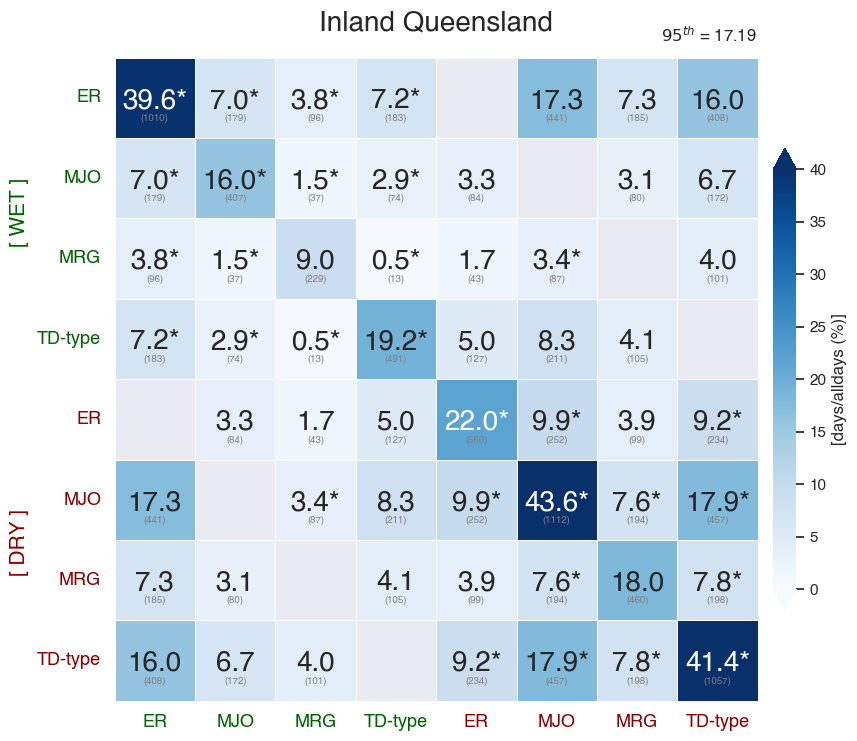

In [33]:
#remember that there are no MRG wet phase detected over CY. So.... we'll adjust that here
p = p.round(1)
p2 = p.drop(p.columns[idrop], axis=1)
p2 = p2.drop(p.index[idrop])

# p = p.round(1)
panno = p_sig.drop(p_sig.columns[idrop], axis=1)
panno = panno.drop(p_sig.index[idrop])
# x_sig2 = x_sig.drop(x_sig.columns[idrop], axis=1)
# x_sig2 = x_sig2.drop(x_sig.index[idrop])



n_label2 = n_label.drop(n_label.columns[idrop], axis=1)
n_label2 = n_label2.drop(n_label.index[idrop])



fig = plt.figure(figsize = [10, 10])

g = sns.heatmap(p2,vmin=0,vmax=40, 
                 annot = panno, 
                 annot_kws={'fontsize':20,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('Blues'), cbar_kws={
                     'label': '[days/alldays (%)]', 'shrink': 0.6, 'pad':0.02, 
                     'extend':'both'},
                square=True,
               
               )

h = sns.heatmap(p2, 
                 annot = n_label2, 
                 annot_kws={'fontsize':7,'fontweight':10,'va':'top','color':'grey',
                            },
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

if seas=='mam':
    for label in enumerate(g.xaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        if label[0]>2:
            label[1].set_color("darkred")

    for label in enumerate(g.yaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        label[1].set_rotation(-360)
    #     print(label[0])
        if label[0]>2:
            label[1].set_color("darkred")
            
    g.text(-1.3,2.3,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
    g.text(-1.3,6.3,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")
    g.text(6.95, -0.2, "$95^{th}$ = "+str(th), bbox=dict(facecolor='white', alpha=0.5))


elif seas=='djf':
    for label in enumerate(g.xaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        if label[0]>3:
            label[1].set_color("darkred")
            
    for label in enumerate(g.yaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        label[1].set_rotation(-360)
    #     print(label[0])
        if label[0]>3:
            label[1].set_color("darkred")
            
    g.text(-1.3,2.3,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
    g.text(-1.3,6.4,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")
    g.text(6.8, -0.2, "$95^{th}$ = "+str(th), bbox=dict(facecolor='white', alpha=0.5))


# g.text(-1.3,2.3,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
# g.text(-1.3,6.4,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")

g.set_title("Inland Queensland", fontsize=20, pad=20)

In [34]:
x.columns
# flights_piv.columns

Index(['ER', 'Kelvin', 'MJO', 'MRG', 'TD-type', 'ER', 'Kelvin', 'MJO', 'MRG',
       'TD-type'],
      dtype='object')

In [35]:
fig.savefig(diro+"combined_percentmap_QL."+seas+".png",dpi=300)
fig.savefig(diro+"combined_percentmao_QL."+seas+".eps", dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
